<a href="https://colab.research.google.com/github/raamav/Image-Classification/blob/master/CIFAR_10_CNN_(ver_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification Using CNNs (`CIFAR10` dataset)

The model architecture is *heavily inspired* from the Alexnet Architecture, the winner of Image Net competition in 2012. [more details in the Alexnet research paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) 

Alexnet comprises 5 convolutional layers followed by 3 fully connected layers.

In my case, I'll have `3 Convolutional layers`, each layer followed by a Maxpooling layer, which will be followed by `2 Dense layers` (one of which is an output layer)

### Result


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [3]:
# Getting Data

train = tfds.load('cifar10',split = 'train', shuffle_files = True)
#test = tfds.load('cifar10',split = 'test', shuffle_files = True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete67PZ1N/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete67PZ1N/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.0. Subsequent calls will reuse this data.


In [0]:
# Getting Data

#train = tfds.load('cifar10',split = 'train', shuffle_files = True)
test = tfds.load('cifar10',split = 'test', shuffle_files = True)

In [4]:
type(train)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [0]:
# Converting it to Numpy array

train_gen = tfds.as_numpy(train)
test_gen = tfds.as_numpy(test)

In [11]:
type(sample)

generator

In [14]:
# for eg in sample:
#   print("Type and Shape of a generator object",type(eg), len(eg))
#   break


Type and Shape of a generator object <class 'dict'> 2


In [15]:
# eg['image'].shape

(32, 32, 3)

In [0]:
# Hard-coding now, find a better way later
m = 50000
m_t = 10000

In [0]:
X_train = np.zeros((m,32,32,3))
y_train = np.zeros((m,1))

X_test = np.zeros((m_t,32,32,3))
y_test = np.zeros((m_t,1))

In [0]:
# Checking the arrays
assert X_train.shape == (50000,32,32,3)
assert y_train.shape == (50000,1)

In [0]:
# Converting the generator to a numpy array -- Training Set

i = 0
for a in train_gen:
  X_train[i] = a['image']
  y_train[i] = a['label']
  i += 1

assert X_train.shape == (50000,32,32,3)
assert y_train.shape == (50000,1)

This is a proper win. HappyFace !

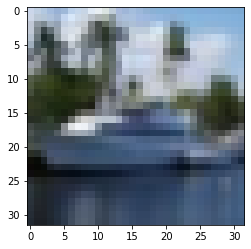

In [34]:
# Printing out a sample image
# I am having to do the casting because as a workaround to a pyplot legacy issue 
# discussion on stackoverflow: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

plt.imshow(X_train[1].astype('uint8'))


In [46]:
# Converting the generator to a numpy array -- Training Set

j = 0
for b in test_gen:
  X_test[j] = b['image']
  y_test[j] = b['label']
  j += 1

print(j)
assert X_test.shape == (m_t,32,32,3)
assert y_test.shape == (m_t,1)

0


In [47]:
X_test[1]

array([[[ 42.,  46.,  38.],
        [ 37.,  45.,  34.],
        [ 52.,  63.,  49.],
        ...,
        [233., 233., 232.],
        [215., 214., 211.],
        [173., 172., 166.]],

       [[ 54.,  58.,  48.],
        [ 42.,  49.,  40.],
        [ 37.,  46.,  38.],
        ...,
        [192., 188., 187.],
        [129., 125., 123.],
        [101.,  96.,  94.]],

       [[134., 138., 129.],
        [ 92., 100.,  90.],
        [ 31.,  41.,  29.],
        ...,
        [157., 142., 138.],
        [178., 169., 163.],
        [119., 118., 112.]],

       ...,

       [[ 60., 107.,  51.],
        [ 57., 102.,  52.],
        [ 47., 101.,  45.],
        ...,
        [ 39.,  97.,  52.],
        [ 36.,  94.,  49.],
        [ 37.,  95.,  50.]],

       [[ 64., 110.,  49.],
        [ 63., 109.,  54.],
        [ 59., 112.,  51.],
        ...,
        [ 51., 105.,  53.],
        [ 45.,  98.,  47.],
        [ 45.,  99.,  47.]],

       [[ 74., 121.,  57.],
        [ 66., 115.,  56.],
        [ 64., 1

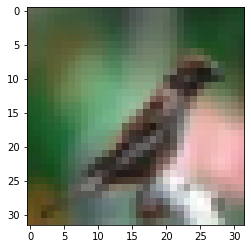

In [48]:
# Printing out a sample image
# I am having to do the casting because as a workaround to a pyplot legacy issue 
# discussion on stackoverflow: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

plt.imshow(X_test[2].astype('uint8'))


In [0]:
# Normalizing the Data

X_train = X_train/255.0
X_test = X_test/255.0

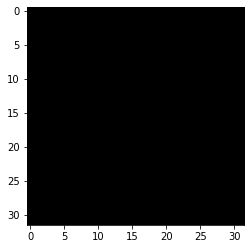

In [50]:
# How does the normalized data ook

plt.imshow(X_test[2].astype('uint8'))


The plan is to use the Keras Functional API

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

try out batch norm on 3rd dimension as ANG did (he used BN before implementing activation

In [0]:
# Defining the model architecture

input_point = keras.Input(shape = (32,32,3), name = "img")

x = layers.Conv2D(filters = 16, kernel_size = 4, padding = 'same', activation = None)(input_point)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = None)(x)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = None)(x)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Flatten() (x)

x = layers.Dense(512, activation = 'relu')(x)
x = layers.BatchNormalization() (x)
x = layers.Dropout(rate = 0.1) (x)

x = layers.Dense(64, activation = 'relu')(x)
x = layers.BatchNormalization() (x)

output = layers.Dense(10, activation = "softmax") (x)

In [61]:
# Create Model and Print Out Archiecture

model = keras.Model(inputs = input_point, outputs = output, name = "AlexNet_sub" )

model.summary()

Model: "AlexNet_sub"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 16)        784       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_21 (Batc (None, 16, 16, 32)        

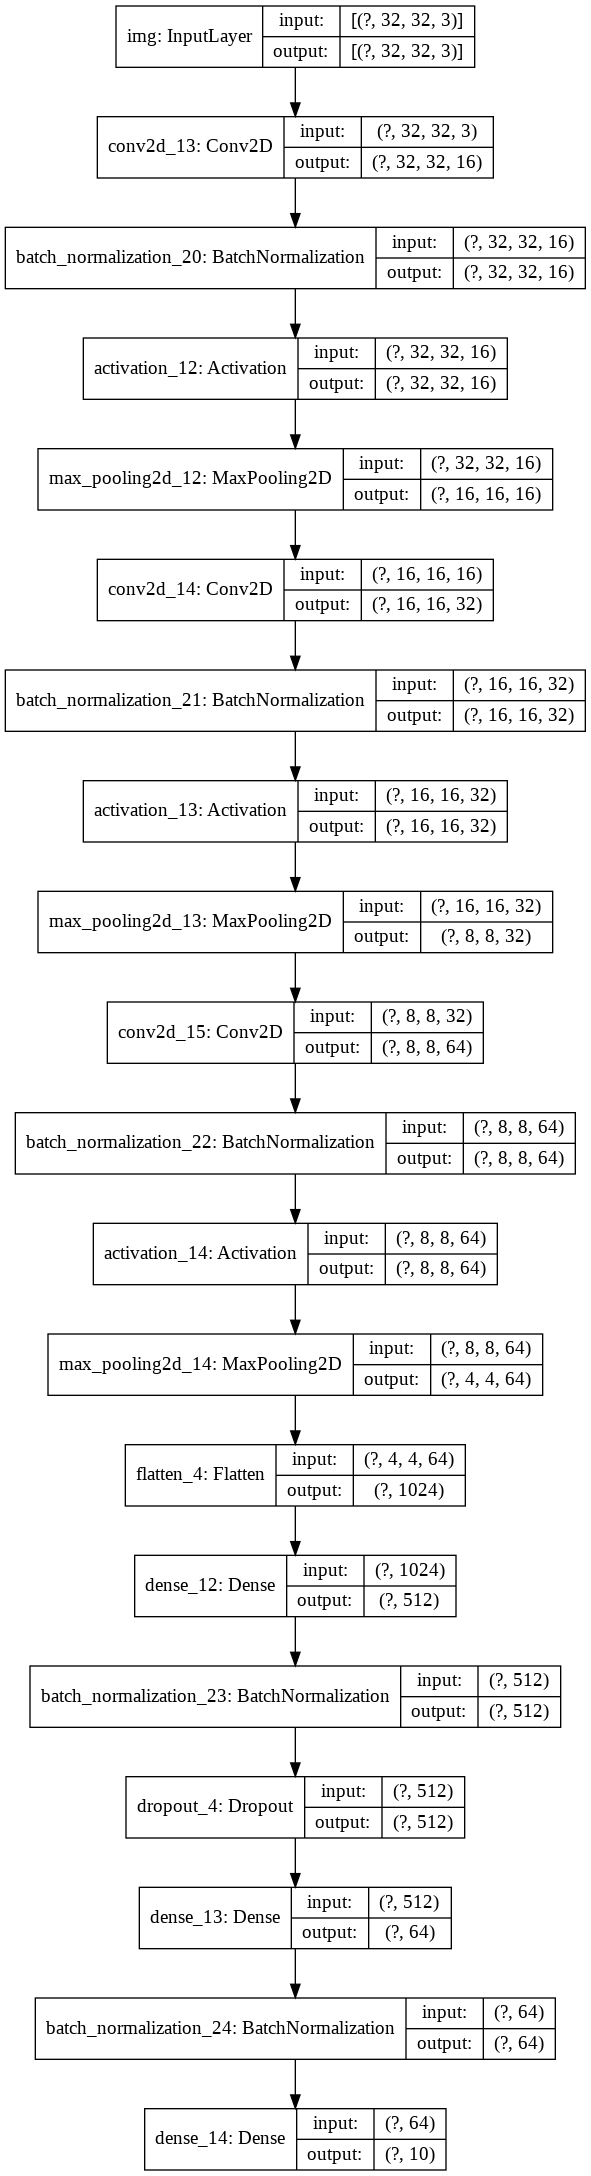

In [66]:
# Plotting the model architecture

keras.utils.plot_model(model, "cifar10_arch.png", show_shapes = True)


In [0]:
# Specifying Loss Function, Optimizer and Callbacks

